In [8]:
import pandas
import math
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [9]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [13]:
X_train[0].shape

(28, 28)

In [14]:
X_train = X_train/255
X_test = X_test/255

The problem is input_shape.

It should actually contain 3 dimensions only. And internally keras will add the batch dimension making it 4.

Since you probably used input_shape with 4 dimensions (batch included), keras is adding the 5th.

You should use input_shape=(28,28,1).

so, we need to reshape it to (28, 28, 1).

1 - indicates that its a grayscale image.



In [35]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [36]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(filters=28, kernel_size=(4, 4), activation='relu', input_shape=(28, 28, 1)))
cnn.add(layers.MaxPooling2D((2, 2)))

cnn.add(layers.Conv2D(filters=56, kernel_size=(4, 4), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))

cnn.add(layers.Flatten())
cnn.add(layers.Dense(64, activation='relu'))
cnn.add(layers.Dense(10, activation='softmax'))

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 38s 16ms/step - loss: 0.1425 - accuracy: 0.9564
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0464 - accuracy: 0.9860
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0337 - accuracy: 0.9898
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0240 - accuracy: 0.9926
Epoch 5/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0193 - accuracy: 0.9940
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0144 - accuracy: 0.9952
Epoch 7/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0134 - accuracy: 0.9953
Epoch 8/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0102 - accuracy: 0.9968
Epoch 9/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0084 - accuracy: 0.9974
Epoch 10/10
1875/1875 [==============================] - 29s 15m

In [41]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.0275 - accuracy: 0.9926


[0.02752298302948475, 0.9926000237464905]

In [44]:
y_pred = cnn.predict(X_test)
y_pred

array([[9.4203183e-14, 6.7570407e-12, 1.4158801e-08, ..., 1.0000000e+00,
        6.8816324e-15, 5.9513443e-11],
       [4.4867079e-12, 7.2228941e-17, 1.0000000e+00, ..., 1.1971285e-19,
        1.2475262e-08, 2.1571281e-19],
       [1.1117641e-09, 9.9999940e-01, 2.8724075e-11, ..., 1.2271114e-07,
        9.8888108e-08, 3.8861986e-10],
       ...,
       [2.2705702e-21, 4.1326036e-14, 1.7763041e-16, ..., 1.5561459e-13,
        6.0251704e-12, 9.5878211e-16],
       [1.7614264e-15, 1.5827051e-18, 3.1744959e-20, ..., 6.3943502e-16,
        8.8690377e-10, 2.1109733e-10],
       [1.0009393e-14, 2.9003687e-16, 2.1208060e-16, ..., 2.1067552e-20,
        1.7784669e-16, 8.5417669e-19]], dtype=float32)

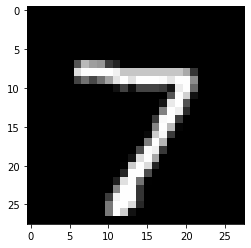

In [46]:
# Plotting the first image
plt.imshow(X_test[0].reshape(28, 28), cmap='gray')

In [47]:
# find max in every row
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [49]:
# construct a confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test, y_pred)

In [50]:
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    0,    1,    0,    1,    1,    0,    1,    2,    0],
       [   1, 1128,    0,    0,    1,    0,    2,    1,    1,    1],
       [   0,    0, 1023,    0,    0,    0,    2,    6,    1,    0],
       [   0,    1,    1, 1004,    0,    3,    0,    0,    1,    0],
       [   0,    0,    1,    0,  977,    0,    2,    0,    0,    2],
       [   0,    0,    0,    6,    0,  883,    1,    1,    0,    1],
       [   1,    1,    0,    0,    1,    3,  950,    0,    2,    0],
       [   1,    2,    1,    0,    0,    0,    0, 1023,    0,    1],
       [   0,    0,    2,    0,    0,    2,    0,    0,  969,    1],
       [   1,    0,    0,    0,    4,    4,    0,    3,    2,  995]])>

In [56]:
# print the accuracy of the cnn model
print("Accuracy: " + str(cnn.evaluate(X_test, y_test)[1]*100))

313/313 [==============================] - 2s 7ms/step - loss: 0.0275 - accuracy: 0.9926
Accuracy: 99.26000237464905
